In [1]:
# Standard library imports
import os
import random
import re
import sys
from itertools import product

# Third-party imports
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from joblib import load
from scipy.stats import mannwhitneyu, pearsonr, spearmanr, wilcoxon
from tqdm import tqdm

# Plotly imports
import plotly.graph_objects as go

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))
import CPC_package as CPC
AddHealth_Graphs = CPC.getAddHealthGraphs()

100%|██████████| 85/85 [00:02<00:00, 32.53it/s]


# General Influence Model

In [3]:
df_RS = load('./RS002_CA_asymmetry_threshold_AddHealth.joblib')
df_RCSP = load('./RCSP002_CA_asymmetry_threshold_AddHealth.joblib')

<>:39: SyntaxWarning: invalid escape sequence '\X'
<>:51: SyntaxWarning: invalid escape sequence '\X'
<>:39: SyntaxWarning: invalid escape sequence '\X'
<>:51: SyntaxWarning: invalid escape sequence '\X'
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/1538291667.py:39: SyntaxWarning: invalid escape sequence '\X'
  axs[0, 0].set_ylabel('$\Xi_s$(RS)', fontsize=26, labelpad=10, fontweight='bold')
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/1538291667.py:51: SyntaxWarning: invalid escape sequence '\X'
  axs[1, 0].set_ylabel('$\Xi_s$(RCS)', fontsize=26, labelpad=10, fontweight='bold')


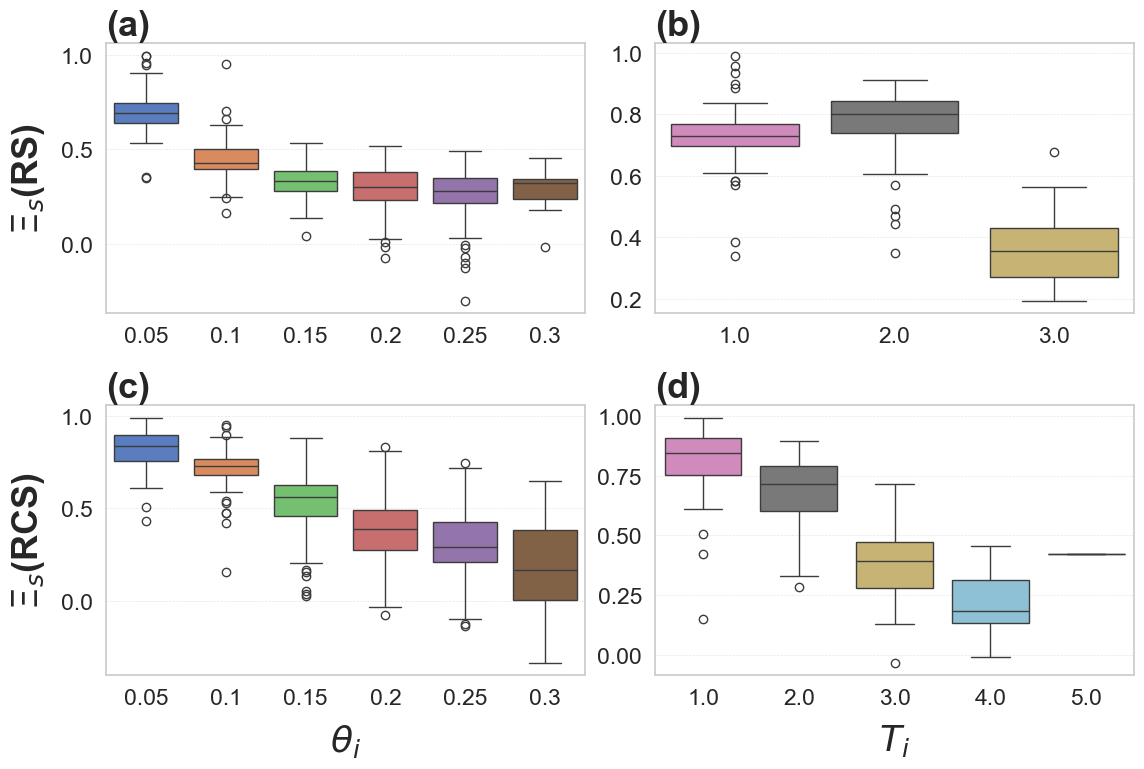

In [4]:
# Figure 8

df_RS = load('./RS002_CA_asymmetry_threshold_AddHealth.joblib')
df_RCSP = load('./RCSP002_CA_asymmetry_threshold_AddHealth.joblib')

#cast the T column to a float
df_RS['T'] = df_RS['T'].astype(float)
df_RCSP['T'] = df_RCSP['T'].astype(float)

df_RS = df_RS[df_RS['spreadingDensity'] > 0.1]
df_RCSP = df_RCSP[df_RCSP['spreadingDensity'] > 0.1]

df_top_left = df_RS.copy()
df_top_left = df_top_left[df_top_left['T'] < 1]

df_top_right = df_RS.copy()
df_top_right = df_top_right[df_top_right['T'] >= 1]

df_bottom_left = df_RCSP.copy()
df_bottom_left = df_bottom_left[df_bottom_left['T'] < 1]

df_bottom_right = df_RCSP.copy()
df_bottom_right = df_bottom_right[df_bottom_right['T'] >= 1]

# Define consistent colors for each unique T value with a muted color palette
unique_T_values = sorted(set(list(df_RS['T'].unique()) + list(df_RCSP['T'].unique())))
unique_T_values = [float(i) for i in unique_T_values]  # Ensure T values are floats
custom_palette = sns.color_palette("muted", len(unique_T_values))
color_mapping = dict(zip(unique_T_values, custom_palette))

# Set up Seaborn style
sns.set(style="whitegrid", font_scale=1.5)  # Increase font scale for clarity

fig, axs = plt.subplots(2, 2, figsize=(12,8))  # Increase figure size for better readability

# Top-left plot (a)
sns.boxplot(x='T', y='symmetry', data=df_top_left, ax=axs[0, 0], palette=color_mapping, hue='T', dodge=False, legend=False)
axs[0, 0].set_xlabel('')  # Remove redundant x-axis label
axs[0, 0].set_ylabel('$\Xi_s$(RS)', fontsize=26, labelpad=10, fontweight='bold')
axs[0, 0].set_title("(a)", fontsize=26, fontweight='bold', loc='left')

# Top-right plot (b)
sns.boxplot(x='T', y='symmetry', data=df_top_right, ax=axs[0, 1], palette=color_mapping, hue='T', dodge=False, legend=False)
axs[0, 1].set_xlabel('')  # Remove redundant x-axis label
axs[0, 1].set_ylabel('')  # Remove redundant y-axis label
axs[0, 1].set_title("(b)", fontsize=26, fontweight='bold', loc='left')

# Bottom-left plot (c)
sns.boxplot(x='T', y='symmetry', data=df_bottom_left, ax=axs[1, 0], palette=color_mapping, hue='T', dodge=False, legend=False)
axs[1, 0].set_xlabel(r'$\theta_i$', fontsize=26, labelpad=10, fontweight='bold')
axs[1, 0].set_ylabel('$\Xi_s$(RCS)', fontsize=26, labelpad=10, fontweight='bold')
axs[1, 0].set_title("(c)", fontsize=26, fontweight='bold', loc='left')

# Bottom-right plot (d)
sns.boxplot(x='T', y='symmetry', data=df_bottom_right, ax=axs[1, 1], palette=color_mapping, hue='T', dodge=False, legend=False)
axs[1, 1].set_xlabel(r'$T_i$', fontsize=26, labelpad=10, fontweight='bold')
axs[1, 1].set_ylabel('')  # Remove redundant y-axis label
axs[1, 1].set_title("(d)", fontsize=26, fontweight='bold', loc='left')

# Adjust layout for better spacing between subplots
plt.tight_layout(pad=1.0)  # Increase padding between subplots

# Lighten grid lines for a more subtle effect
for ax in axs.flat:
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)  # Ensure gridlines are behind plot elements

plt.savefig('boxplot_symmetry_quad_Addhealth.png', dpi=300)

plt.show()


In [5]:
#Figure 2
# --- Load and preprocess datasets ---
datasets = {
    'AddHealth': load('./RCSP002_CA_asymmetry_threshold_AddHealth.joblib'),
    'Banerjee': load('./RCSP002_CA_asymmetry_threshold_Banerjee.joblib'),
    'Watts-Strogatz_absolute': load('./RCSP002_CA_asymmetry_threshold_WS.joblib'),
    'Watts-Strogatz_relative': load('./RCSP002_CA_asymmetry_threshold_WS.joblib')
}

# Define consistent color mapping across all plots using AddHealth T values
unique_T_values = sorted(set(datasets['AddHealth']['T'].astype(float).unique()))
custom_palette = sns.color_palette("muted", len(unique_T_values))
color_mapping = dict(zip(unique_T_values, custom_palette))

# Preprocess each DataFrame
for key in datasets:
    df = datasets[key]
    df['T'] = df['T'].astype(float)
    df = df[df['spreadingDensity'] > 0.1]
    if key == 'Watts-Strogatz_absolute':
        df = df[df['T'] >= 1]
        df = df[df['T'] <= 3]
    else:
        df = df[df['T'] < 1]
    datasets[key] = df

# Set seaborn style once
sns.set(style="whitegrid", font_scale=1.5)

# Plot config
plot_width, plot_height = 6, 4

# Plot and save each with Pearson correlation + significance annotation
for label, df in datasets.items():
    fig, ax = plt.subplots(figsize=(plot_width, plot_height))

    # Boxplot
    sns.boxplot(
        x='T', y='symmetry', data=df, palette=color_mapping, hue='T',
        dodge=False, ax=ax, legend=False, showfliers=False
    )

    # Pearson correlation
    pearson_corr, p_value = pearsonr(df['T'], df['symmetry'])

    # Significance stars based on p-value
    if p_value <= 0.001:
        stars = '***'
    elif p_value <= 0.01:
        stars = '**'
    elif p_value <= 0.05:
        stars = '*'
    else:
        stars = ''

    # Annotate Pearson r with stars in bottom-left
    ax.text(
        0.05, 0.05, f'$r$ = {pearson_corr:.2f} {stars}',
        transform=ax.transAxes,
        ha='left', va='bottom', fontsize=16,
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

    # Y-axis settings
    if label in ['AddHealth', 'Banerjee']:
        yticks = [-0.25, 0.0, 0.25, 0.5, 0.75, 1.0]
        ax.set_ylim(-0.4, 1)
    else:
        yticks = [-0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]
        ax.set_ylim(-0.7, 1)
    ax.set_yticks(yticks)

    # Axis labels
    ax.set_ylabel(r'$\Xi_s$(RCS)', fontsize=24, labelpad=10, fontweight='bold')
    if label == 'Watts-Strogatz_absolute':
        ax.set_xlabel(r'$T_i$', fontsize=24, labelpad=10, fontweight='bold')
    else:
        ax.set_xlabel(r'$\theta_i$', fontsize=24, labelpad=10, fontweight='bold')

    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)

    # Save figure
    plt.tight_layout()
    plt.savefig(f'boxplot_symmetry_{label.replace("-", "_")}.png', dpi=300)
    plt.close()


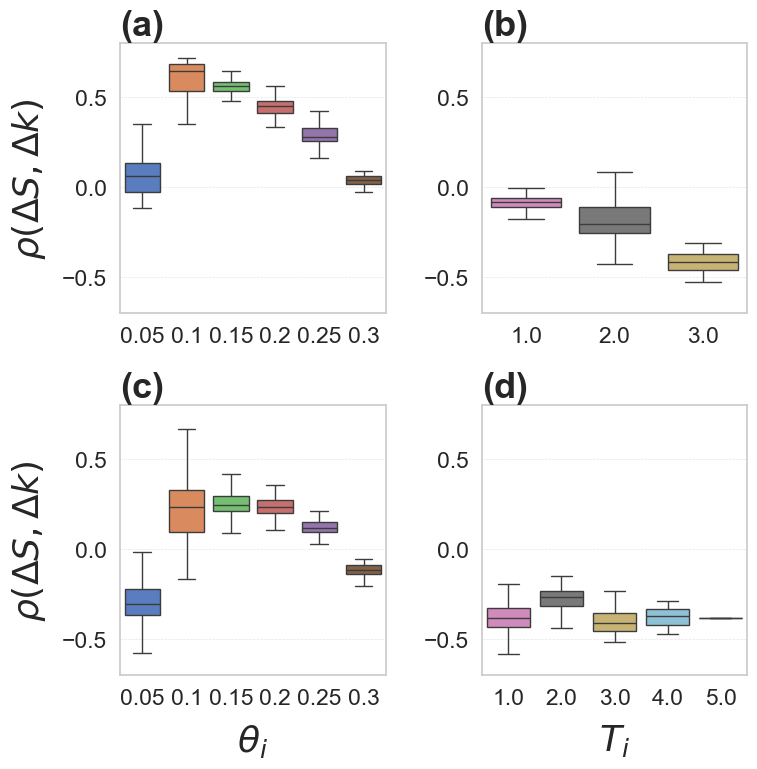

In [6]:
# Figure 14

df_RS = load('./RS002_CA_asymmetry_threshold_AddHealth.joblib')
df_RCSP = load('./RCSP002_CA_asymmetry_threshold_AddHealth.joblib')

#cast the T column to a float
df_RS['T'] = df_RS['T'].astype(float)
df_RCSP['T'] = df_RCSP['T'].astype(float)

df_RS = df_RS[df_RS['spreadingDensity'] > 0.1]
df_RCSP = df_RCSP[df_RCSP['spreadingDensity'] > 0.1]

df_top_left = df_RS.copy()
df_top_left = df_top_left[df_top_left['T'] < 1]

df_top_right = df_RS.copy()
df_top_right = df_top_right[df_top_right['T'] >= 1]

df_bottom_left = df_RCSP.copy()
df_bottom_left = df_bottom_left[df_bottom_left['T'] < 1]

df_bottom_right = df_RCSP.copy()
df_bottom_right = df_bottom_right[df_bottom_right['T'] >= 1]

# Define consistent colors for each unique T value with a muted color palette
unique_T_values = sorted(set(list(df_RS['T'].unique()) + list(df_RCSP['T'].unique())))
unique_T_values = [float(i) for i in unique_T_values]  # Ensure T values are floats
custom_palette = sns.color_palette("muted", len(unique_T_values))
color_mapping = dict(zip(unique_T_values, custom_palette))

# Set up Seaborn style
sns.set(style="whitegrid", font_scale=1.5)  # Increase font scale for clarity

fig, axs = plt.subplots(2, 2, figsize=(8, 8))  # Increase figure size for better readability

# Top-left plot (a)
sns.boxplot(x='T', y='Degree_difference_CPC_correlation', data=df_top_left, ax=axs[0, 0], palette=color_mapping, hue='T', dodge=False, legend=False, showfliers=False)
axs[0, 0].set_xlabel('')  # Remove redundant x-axis label
axs[0, 0].set_ylabel(r'$\rho(\Delta S, \Delta k)$', fontsize=26, labelpad=10, fontweight='bold')
axs[0, 0].set_title("(a)", fontsize=26, fontweight='bold', loc='left')
axs[0, 0].set_ylim(-0.7, 0.8)  # Set y-axis limits for better visibility

# Top-right plot (b)
sns.boxplot(x='T', y='Degree_difference_CPC_correlation', data=df_top_right, ax=axs[0, 1], palette=color_mapping, hue='T', dodge=False, legend=False, showfliers=False)
axs[0, 1].set_xlabel('')  # Remove redundant x-axis label
axs[0, 1].set_ylabel('')  # Remove redundant y-axis label
axs[0, 1].set_title("(b)", fontsize=26, fontweight='bold', loc='left')
axs[0, 1].set_ylim(-0.7, 0.8)  # Set y-axis limits for better visibility

# Bottom-left plot (c)
sns.boxplot(x='T', y='Degree_difference_CPC_correlation', data=df_bottom_left, ax=axs[1, 0], palette=color_mapping, hue='T', dodge=False, legend=False, showfliers=False)
axs[1, 0].set_xlabel(r'$\theta_i$', fontsize=26, labelpad=10, fontweight='bold')
axs[1, 0].set_ylabel(r'$\rho(\Delta S, \Delta k)$', fontsize=26, labelpad=10, fontweight='bold')
axs[1, 0].set_title("(c)", fontsize=26, fontweight='bold', loc='left')
axs[1, 0].set_ylim(-0.7, 0.8)  # Set y-axis limits for better visibility

# Bottom-right plot (d)
sns.boxplot(x='T', y='Degree_difference_CPC_correlation', data=df_bottom_right, ax=axs[1, 1], palette=color_mapping, hue='T', dodge=False, legend=False, showfliers=False)
axs[1, 1].set_xlabel(r'$T_i$', fontsize=26, labelpad=10, fontweight='bold')
axs[1, 1].set_ylabel('')  # Remove redundant y-axis label
axs[1, 1].set_title("(d)", fontsize=26, fontweight='bold', loc='left')
axs[1, 1].set_ylim(-0.7, 0.8)  # Set y-axis limits for better visibility

# Adjust layout for better spacing between subplots
plt.tight_layout(pad=1.0)  # Increase padding between subplots

# Lighten grid lines for a more subtle effect
for ax in axs.flat:
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)  # Ensure gridlines are behind plot elements

plt.savefig('boxplot_delta_corr_RS_RCSP_01cutoff_AddHealth.png', dpi=300)

plt.show()


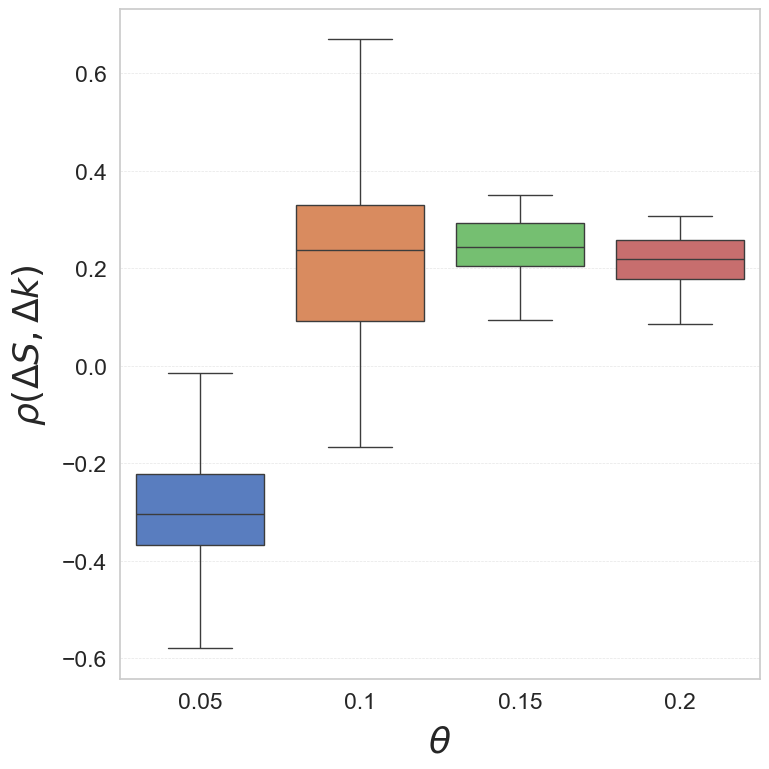

In [7]:
# Figure 5b

df_RCSP = load('./RCSP002_CA_asymmetry_threshold_AddHealth.joblib')
df_bottom_left = df_RCSP.copy()
df_bottom_left = df_bottom_left[df_bottom_left['T'] < 1]
df_bottom_left = df_bottom_left[df_bottom_left['spreadingDensity'] == 1]

# Set up Seaborn style
sns.set(style="whitegrid", font_scale=1.5)  # Increase font scale for clarity

fig, axs = plt.subplots(figsize=(8, 8))  # Create a single subplot

# Boxplot without outliers
sns.boxplot(x='T', y='Degree_difference_CPC_correlation', data=df_bottom_left, 
            ax=axs, palette=color_mapping, hue='T', dodge=False, showfliers=False)

# Remove legend
axs.legend_.remove()

# Labels and title
axs.set_xlabel(r'$\theta$', fontsize=26, labelpad=10, fontweight='bold')  # Model parameter notation
axs.set_ylabel(r'$\rho(\Delta S, \Delta k)$', fontsize=26, labelpad=10, fontweight='bold')  # Correlation notation

# Adjust layout for better spacing
plt.tight_layout(pad=1.0)

# Lighten grid lines
axs.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
axs.set_axisbelow(True)  # Ensure gridlines are behind plot elements

# Save and show
plt.savefig('boxplot_delta_corr_only.png', dpi=300)
plt.show()


In [8]:

correlations_low_theta = df_bottom_left[df_bottom_left['T'] == 0.05]['Degree_difference_CPC_correlation']

correlations_mid_theta = df_bottom_left[(df_bottom_left['T'] >= 0.10) & (df_bottom_left['T'] <= 0.25)]['Degree_difference_CPC_correlation']

stat_wilcoxon_low, p_wilcoxon_low = wilcoxon(correlations_low_theta)
median_low = np.median(correlations_low_theta)

stat_wilcoxon_mid, p_wilcoxon_mid = wilcoxon(correlations_mid_theta)
median_mid = np.median(correlations_mid_theta)

stat_mwu, p_mwu = mannwhitneyu(correlations_low_theta, correlations_mid_theta, alternative='less')

print("=== Statistical Tests for Negative-to-Positive Transition ===")
print(f"θ = 0.05: Median ρ(ΔS, Δk) = {median_low:.4f}, Wilcoxon p-value = {p_wilcoxon_low:.4g}")
print(f"θ ∈ [0.10, 0.25]: Median ρ(ΔS, Δk) = {median_mid:.4f}, Wilcoxon p-value = {p_wilcoxon_mid:.4g}")
print(f"Mann-Whitney U Test (θ=0.05 vs θ∈[0.10,0.25]): U = {stat_mwu:.2f}, p-value = {p_mwu:.4g}")


=== Statistical Tests for Negative-to-Positive Transition ===
θ = 0.05: Median ρ(ΔS, Δk) = -0.3035, Wilcoxon p-value = 5.725e-14
θ ∈ [0.10, 0.25]: Median ρ(ΔS, Δk) = 0.2351, Wilcoxon p-value = 6.608e-29
Mann-Whitney U Test (θ=0.05 vs θ∈[0.10,0.25]): U = 43.00, p-value = 1.187e-35


In [9]:
theta_all = df_bottom_left['T']
rho_all = df_bottom_left['Degree_difference_CPC_correlation']

spearman_corr, p_value = spearmanr(theta_all, rho_all)

print(f"Spearman correlation between theta and rho(ΔS, Δk): {spearman_corr:.4f}")
print(f"p-value: {p_value:.4f}")


Spearman correlation between theta and rho(ΔS, Δk): 0.6448
p-value: 0.0000


# LTM

<>:34: SyntaxWarning: invalid escape sequence '\X'
<>:42: SyntaxWarning: invalid escape sequence '\X'
<>:34: SyntaxWarning: invalid escape sequence '\X'
<>:42: SyntaxWarning: invalid escape sequence '\X'
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/2577076825.py:34: SyntaxWarning: invalid escape sequence '\X'
  axs[0].set_ylabel('$\Xi_s(RS)$', fontsize=26, labelpad=10, fontweight='bold')
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/2577076825.py:42: SyntaxWarning: invalid escape sequence '\X'
  axs[1].set_ylabel('$\Xi_s(RCS)$', fontsize=26, labelpad=10, fontweight='bold')


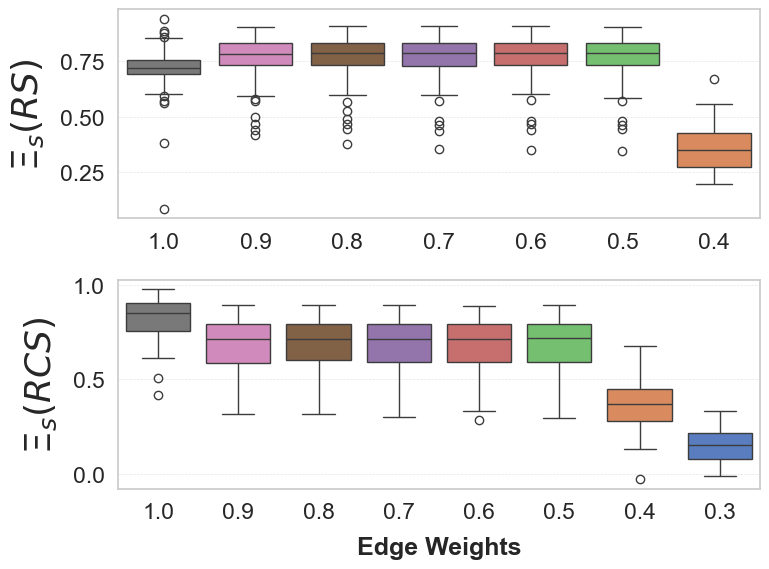

In [10]:
# Figure 11

df_RS = load('./LTM_RS002_CA_asymmetry_threshold_AddHealth.joblib')
df_RCSP = load('./LTM_RCSP002_CA_asymmetry_threshold_AddHealth.joblib')

#cast the T column to a float
df_RS['eW'] = df_RS['eW'].astype(float)
df_RCSP['eW'] = df_RCSP['eW'].astype(float)

df_RS = df_RS[df_RS['spreadingDensity'] > 0.1]
df_RCSP = df_RCSP[df_RCSP['spreadingDensity'] > 0.15]

#df_RS = df_RS[df_RS['eW'] < 0.7]
#df_RCSP = df_RCSP[df_RCSP['eW'] < 0.7]

df_top_left = df_RS.copy()

df_bottom_left = df_RCSP.copy()

# Define consistent colors for each unique T value with a muted color palette
unique_T_values = sorted(set(list(df_RS['eW'].unique()) + list(df_RCSP['eW'].unique())))
unique_T_values = [float(i) for i in unique_T_values]  # Ensure T values are floats
custom_palette = sns.color_palette("muted", len(unique_T_values))
color_mapping = dict(zip(unique_T_values, custom_palette))

# Set up Seaborn style
sns.set(style="whitegrid", font_scale=1.5)  # Increase font scale for clarity

fig, axs = plt.subplots(2, 1, figsize=(8,6))  # Increase figure size for better readability

# Top-left plot (a)
sns.boxplot(x='eW', y='symmetry', data=df_top_left, ax=axs[0], palette=color_mapping, hue='eW', dodge=False, legend=False)
axs[0].set_xlabel('')  # Remove redundant x-axis label
axs[0].set_ylabel('$\Xi_s(RS)$', fontsize=26, labelpad=10, fontweight='bold')
#make the x axis descending
axs[0].invert_xaxis()


# Bottom-left plot (c)
sns.boxplot(x='eW', y='symmetry', data=df_bottom_left, ax=axs[1], palette=color_mapping, hue='eW', dodge=False, legend=False)
axs[1].set_xlabel('Edge Weights', fontsize=18, labelpad=10, fontweight='bold')
axs[1].set_ylabel('$\Xi_s(RCS)$', fontsize=26, labelpad=10, fontweight='bold')
#make the x axis descending
axs[1].invert_xaxis()

# Adjust layout for better spacing between subplots
plt.tight_layout(pad=1.0)  # Increase padding between subplots

#set a title above the plots
#plt.suptitle('LTM', fontsize=26, fontweight='bold')

# Lighten grid lines for a more subtle effect
for ax in axs.flat:
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)  # Ensure gridlines are behind plot elements

plt.savefig('boxplot_symmetry_LTM.png', dpi=300)

plt.show()

# ICM

<>:34: SyntaxWarning: invalid escape sequence '\X'
<>:42: SyntaxWarning: invalid escape sequence '\X'
<>:34: SyntaxWarning: invalid escape sequence '\X'
<>:42: SyntaxWarning: invalid escape sequence '\X'
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/1795705253.py:34: SyntaxWarning: invalid escape sequence '\X'
  axs[0].set_ylabel('$\Xi_s(RS)$', fontsize=26, labelpad=10, fontweight='bold')
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/1795705253.py:42: SyntaxWarning: invalid escape sequence '\X'
  axs[1].set_ylabel('$\Xi_s(RCS)$', fontsize=26, labelpad=10, fontweight='bold')


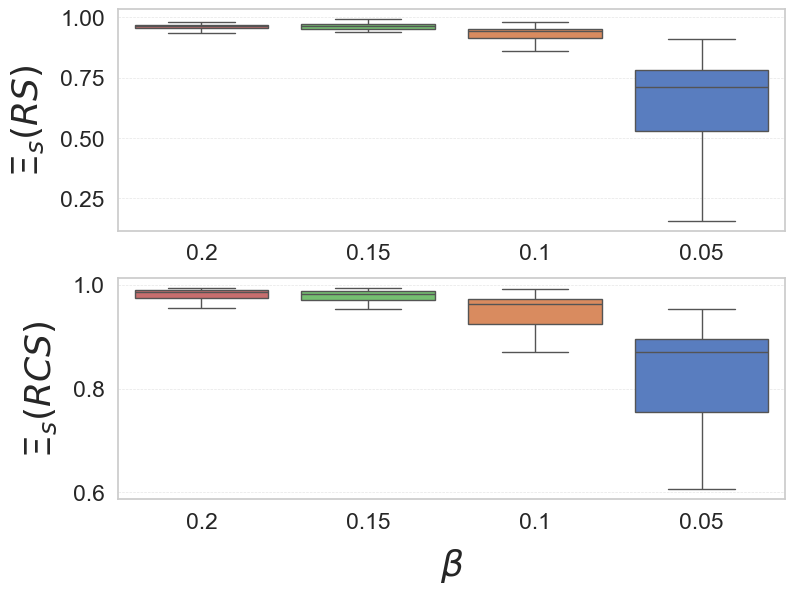

In [11]:
#Figure 13

df_RS = load('./ICM_RS002_CA_asymmetry_threshold_AddHealth.joblib')
df_RCSP = load('./ICM_RCSP002_CA_asymmetry_threshold_AddHealth.joblib')

#cast the T column to a float
df_RS['eP'] = df_RS['eP'].astype(float)
df_RCSP['eP'] = df_RCSP['eP'].astype(float)

#df_RS = df_RS[df_RS['spreadingDensity'] > 0.1]
#df_RCSP = df_RCSP[df_RCSP['spreadingDensity'] > 0.1]

df_RS = df_RS[df_RS['eP'] < 0.25]
df_RCSP = df_RCSP[df_RCSP['eP'] < 0.25]

df_top_left = df_RS.copy()

df_bottom_left = df_RCSP.copy()

# Define consistent colors for each unique T value with a muted color palette
unique_T_values = sorted(set(list(df_RS['eP'].unique()) + list(df_RCSP['eP'].unique())))
unique_T_values = [float(i) for i in unique_T_values]  # Ensure T values are floats
custom_palette = sns.color_palette("muted", len(unique_T_values))
color_mapping = dict(zip(unique_T_values, custom_palette))

# Set up Seaborn style
sns.set(style="whitegrid", font_scale=1.5)  # Increase font scale for clarity

fig, axs = plt.subplots(2, 1, figsize=(8,6))  # Increase figure size for better readability

# Top-left plot (a)
sns.boxplot(x='eP', y='symmetry', data=df_top_left, ax=axs[0], palette=color_mapping, hue='eP', dodge=False, legend=False, showfliers=False)
axs[0].set_xlabel('')  # Remove redundant x-axis label
axs[0].set_ylabel('$\Xi_s(RS)$', fontsize=26, labelpad=10, fontweight='bold')
#make the x axis descending
axs[0].invert_xaxis()


# Bottom-left plot (c)
sns.boxplot(x='eP', y='symmetry', data=df_bottom_left, ax=axs[1], palette=color_mapping, hue='eP', dodge=False, legend=False, showfliers=False)
axs[1].set_xlabel('$\\beta$', fontsize=26, labelpad=10, fontweight='bold')
axs[1].set_ylabel('$\Xi_s(RCS)$', fontsize=26, labelpad=10, fontweight='bold')
#make the x axis descending
axs[1].invert_xaxis()

# Adjust layout for better spacing between subplots
plt.tight_layout(pad=0.5)  # Increase padding between subplots

#set a title above the plots
#plt.suptitle('ICM', fontsize=26, fontweight='bold', y=1.02)

# Lighten grid lines for a more subtle effect
for ax in axs.flat:
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)  # Ensure gridlines are behind plot elements

plt.savefig('boxplot_symmetry_ICM.png', dpi=300)

plt.show()

# Noisy Influence plots

<>:74: SyntaxWarning: invalid escape sequence '\X'
<>:76: SyntaxWarning: invalid escape sequence '\X'
<>:74: SyntaxWarning: invalid escape sequence '\X'
<>:76: SyntaxWarning: invalid escape sequence '\X'
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/2763611561.py:74: SyntaxWarning: invalid escape sequence '\X'
  axs[row, col].set_ylabel('$\Xi_s(RS)$' if col == 0 else '')
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/2763611561.py:76: SyntaxWarning: invalid escape sequence '\X'
  axs[row, col].set_ylabel('$\Xi_s(RCS)$' if col == 0 else '')


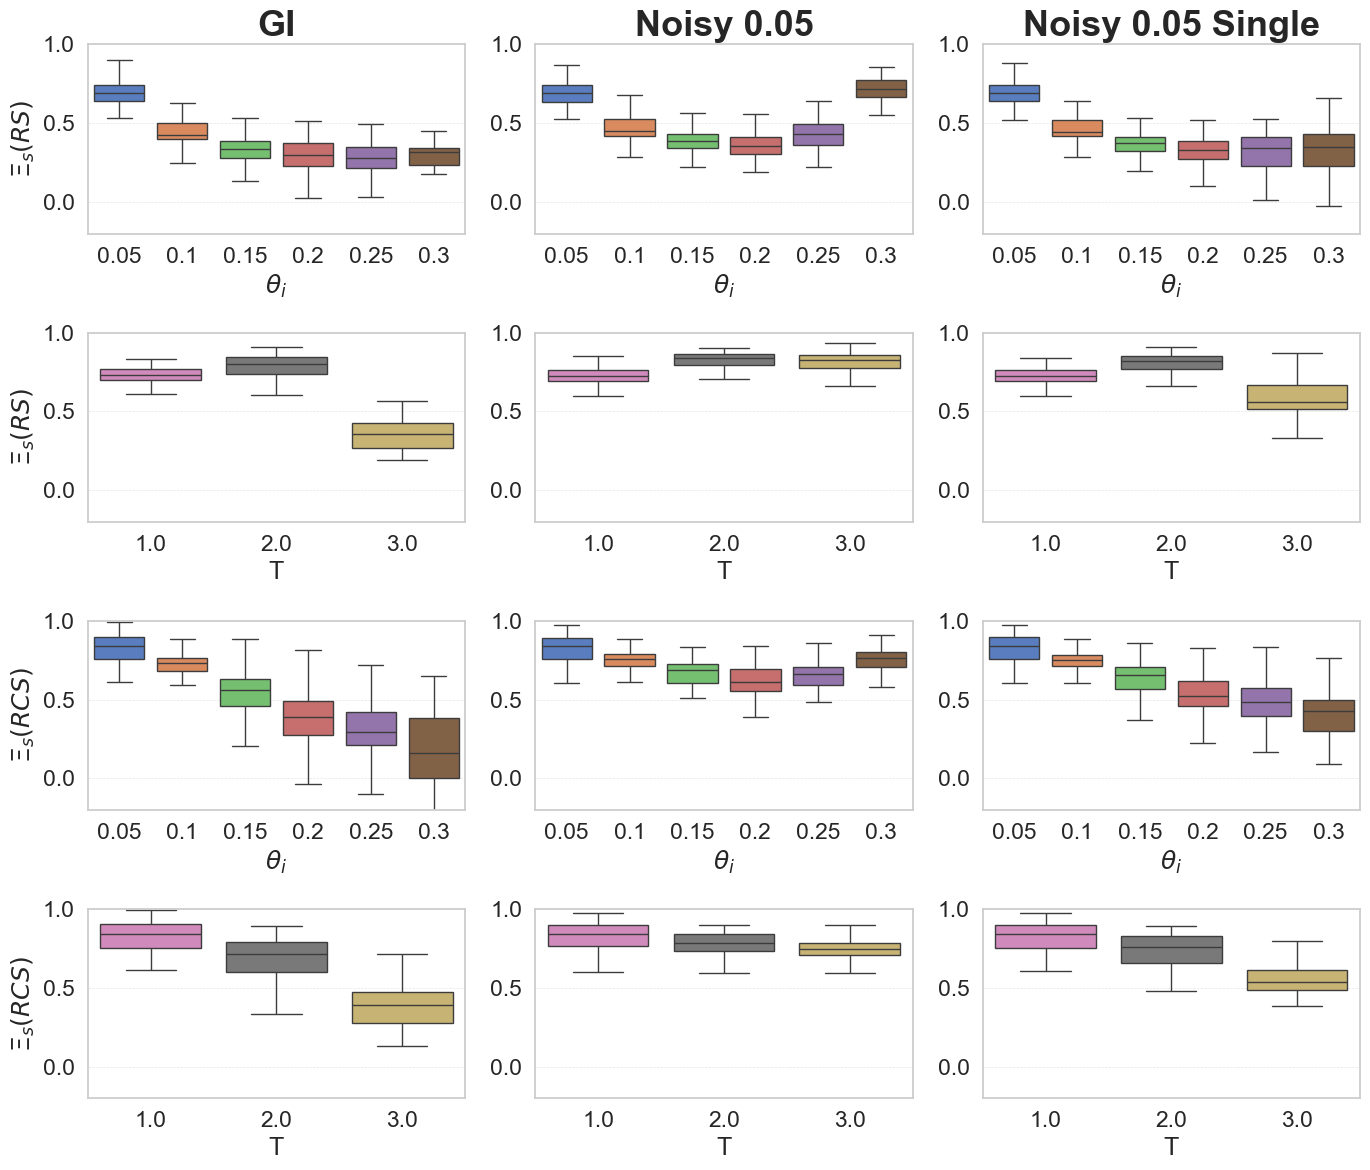

In [12]:
# Figure 9

# Load the datasets
files = [
    './RS002_CA_asymmetry_threshold_AddHealth.joblib',
    './Noisy005_RS002_CA_asymmetry_threshold_AddHealth.joblib',
    './Noisy005_SINGLE_RS002_CA_asymmetry_threshold_AddHealth.joblib',
    './RCSP002_CA_asymmetry_threshold_AddHealth.joblib',
    './Noisy005_RCSP002_CA_asymmetry_threshold_AddHealth.joblib',
    './Noisy005_SINGLE_RCSP002_CA_asymmetry_threshold_AddHealth.joblib'
]

# Load datasets
all_dfs = [load(file) for file in files]

df_RS_list = all_dfs[:3]
df_RCSP_list = all_dfs[3:]

# Process data
for i, (df_RS, df_RCSP) in enumerate(zip(df_RS_list, df_RCSP_list)):
    # Convert T column to float
    df_RS['T'] = df_RS['T'].astype(float)
    df_RCSP['T'] = df_RCSP['T'].astype(float)

    # Filter by spreadingDensity > 0.1
    df_RS = df_RS[df_RS['spreadingDensity'] > 0.1]
    df_RCSP = df_RCSP[df_RCSP['spreadingDensity'] > 0.1]

    df_RS = df_RS[df_RS['T'] < 4]
    df_RCSP = df_RCSP[df_RCSP['T'] < 4]

    # Store processed data
    df_RS_list[i] = df_RS
    df_RCSP_list[i] = df_RCSP


# Define consistent colors for each unique T value
unique_T_values = sorted(set(sum([list(df['T'].unique()) for df in df_RS_list + df_RCSP_list], [])))
custom_palette = sns.color_palette("muted", len(unique_T_values))
color_mapping = dict(zip(unique_T_values, custom_palette))

# Set up Seaborn style
sns.set(style="whitegrid", font_scale=1.5)

# Create subplots
fig, axs = plt.subplots(4, 3, figsize=(14, 12))  # 4 rows, 3 columns

plot_titles = ['GI', 'Noisy 0.05', 'Noisy 0.05 Single']

for col, (df_RS, df_RCSP) in enumerate(zip(df_RS_list, df_RCSP_list)):
    # Define subsets
    df_top_left = df_RS[df_RS['T'] < 1]
    df_top_right = df_RS[df_RS['T'] >= 1]
    df_bottom_left = df_RCSP[df_RCSP['T'] < 1]
    df_bottom_right = df_RCSP[df_RCSP['T'] >= 1]

    # Plotting each plot in the correct position
    sns.boxplot(x='T', y='symmetry', data=df_top_left, ax=axs[0, col], palette=color_mapping, hue='T', dodge=False, legend=False, showfliers=False)
    sns.boxplot(x='T', y='symmetry', data=df_top_right, ax=axs[1, col], palette=color_mapping, hue='T', dodge=False, legend=False, showfliers=False)
    sns.boxplot(x='T', y='symmetry', data=df_bottom_left, ax=axs[2, col], palette=color_mapping, hue='T', dodge=False, legend=False, showfliers=False)
    sns.boxplot(x='T', y='symmetry', data=df_bottom_right, ax=axs[3, col], palette=color_mapping, hue='T', dodge=False, legend=False, showfliers=False)

    # Set titles
    axs[0, col].set_title(plot_titles[col], fontsize=26, fontweight='bold')

# Set axis labels
for row in range(4):
    for col in range(3):
        axs[row, col].set_ylim(-0.2, 1)
        axs[row, col].grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
        axs[row, col].set_axisbelow(True)
        axs[row, col].set_xlabel(r'$\theta_i$' if row%2==0 else 'T')
        if row < 2:
            axs[row, col].set_ylabel('$\Xi_s(RS)$' if col == 0 else '')
        else:
            axs[row, col].set_ylabel('$\Xi_s(RCS)$' if col == 0 else '')

plt.tight_layout(pad=1.0)
plt.savefig('combined_boxplots_noisy_005.png', dpi=300)
plt.show()


<>:27: SyntaxWarning: invalid escape sequence '\X'
<>:34: SyntaxWarning: invalid escape sequence '\X'
<>:27: SyntaxWarning: invalid escape sequence '\X'
<>:34: SyntaxWarning: invalid escape sequence '\X'
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/2921758024.py:27: SyntaxWarning: invalid escape sequence '\X'
  axes[0].set_xlabel('$\Xi_s(RS)$', fontsize=20)
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/2921758024.py:34: SyntaxWarning: invalid escape sequence '\X'
  axes[1].set_xlabel('$\Xi_s(RCS)$', fontsize=20)


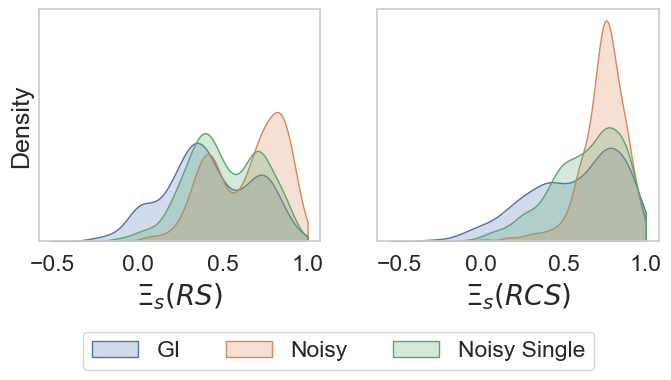

In [13]:
# Figure 10

# Load the datasets
files = [
    './RS002_CA_asymmetry_threshold_AddHealth.joblib',
    './Noisy005_RS002_CA_asymmetry_threshold_AddHealth.joblib',
    './Noisy005_SINGLE_RS002_CA_asymmetry_threshold_AddHealth.joblib',
    
    './RCSP002_CA_asymmetry_threshold_AddHealth.joblib',
    './Noisy005_RCSP002_CA_asymmetry_threshold_AddHealth.joblib',
    './Noisy005_SINGLE_RCSP002_CA_asymmetry_threshold_AddHealth.joblib'
]

# Load datasets
all_dfs = [load(file) for file in files]

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)  # Create 1 row, 2 columns of subplots

# Remove grid lines
for ax in axes:
    ax.grid(False)

# Plot the first set of KDEs (RS)
for df, label in zip(all_dfs[:3], ['GI', 'Noisy', 'Noisy Single']):
    sns.kdeplot(data=df, x='symmetry', fill=True, common_norm=True, label=label, clip=(-1, 1), ax=axes[0])

axes[0].set_xlabel('$\Xi_s(RS)$', fontsize=20)
axes[0].set_yticks([])  # Remove y-axis ticks

# Plot the second set of KDEs (RCS)
for df, label in zip(all_dfs[3:], ['GI', 'Noisy', 'Noisy Single']):
    sns.kdeplot(data=df, x='symmetry', fill=True, common_norm=True, label=label, clip=(-1, 1), ax=axes[1])

axes[1].set_xlabel('$\Xi_s(RCS)$', fontsize=20)
axes[1].set_yticks([])  # Remove y-axis ticks

# Create a single legend below both plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))  # Place legend lower

plt.subplots_adjust(bottom=0.3, wspace=0.2)  # Increase bottom margin and space between plots
plt.savefig('kdeplot_symmetry_RC_RCS_GI_NOISY_SINGLE.png', dpi=300, bbox_inches='tight')
plt.show()


# LTM Gaussian

<>:34: SyntaxWarning: invalid escape sequence '\X'
<>:42: SyntaxWarning: invalid escape sequence '\X'
<>:34: SyntaxWarning: invalid escape sequence '\X'
<>:42: SyntaxWarning: invalid escape sequence '\X'
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/119510020.py:34: SyntaxWarning: invalid escape sequence '\X'
  axs[0].set_ylabel('$\Xi_s(RS)$', fontsize=26, labelpad=10, fontweight='bold')
/var/folders/w_/tpd5jlcs0437ct5ghvt_2kqh0000gn/T/ipykernel_83029/119510020.py:42: SyntaxWarning: invalid escape sequence '\X'
  axs[1].set_ylabel('$\Xi_s(RCS)$', fontsize=26, labelpad=10, fontweight='bold')


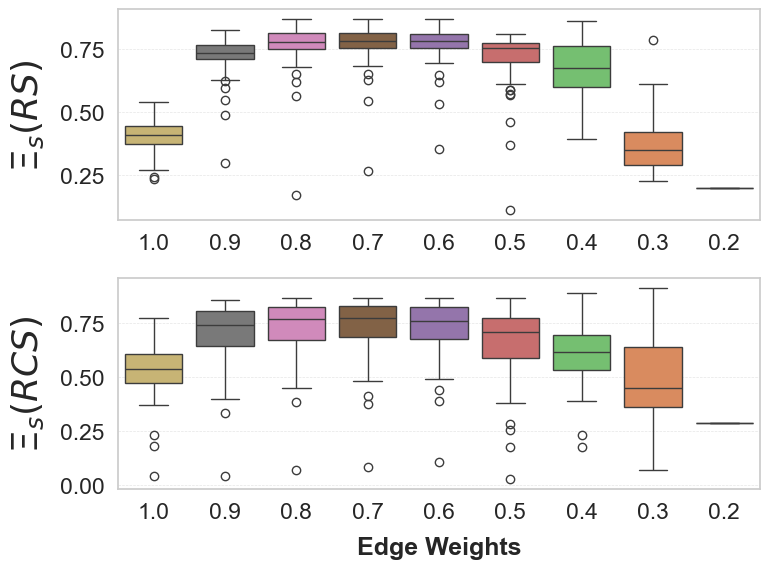

In [14]:
#figure 12

df_RS = load('./LTM_Gaussian_RS005_CA_asymmetry_threshold_AddHealth.joblib')
df_RCSP = load('./LTM_Gaussian_RCSP005_CA_asymmetry_threshold_AddHealth.joblib')

#cast the T column to a float
df_RS['mean_eW'] = df_RS['mean_eW'].astype(float)
df_RCSP['mean_eW'] = df_RCSP['mean_eW'].astype(float)

df_RS = df_RS[df_RS['spreadingDensity'] > 0.1]
df_RCSP = df_RCSP[df_RCSP['spreadingDensity'] > 0.15]

#df_RS = df_RS[df_RS['mean_eW'] < 0.7]
#df_RCSP = df_RCSP[df_RCSP['mean_eW'] < 0.7]

df_top_left = df_RS.copy()

df_bottom_left = df_RCSP.copy()

# Define consistent colors for each unique T value with a muted color palette
unique_T_values = sorted(set(list(df_RS['mean_eW'].unique()) + list(df_RCSP['mean_eW'].unique())))
unique_T_values = [float(i) for i in unique_T_values]  # Ensure T values are floats
custom_palette = sns.color_palette("muted", len(unique_T_values))
color_mapping = dict(zip(unique_T_values, custom_palette))

# Set up Seaborn style
sns.set(style="whitegrid", font_scale=1.5)  # Increase font scale for clarity

fig, axs = plt.subplots(2, 1, figsize=(8,6))  # Increase figure size for better readability

# Top-left plot (a)
sns.boxplot(x='mean_eW', y='symmetry', data=df_top_left, ax=axs[0], palette=color_mapping, hue='mean_eW', dodge=False, legend=False)
axs[0].set_xlabel('')  # Remove redundant x-axis label
axs[0].set_ylabel('$\Xi_s(RS)$', fontsize=26, labelpad=10, fontweight='bold')
#make the x axis descending
axs[0].invert_xaxis()


# Bottom-left plot (c)
sns.boxplot(x='mean_eW', y='symmetry', data=df_bottom_left, ax=axs[1], palette=color_mapping, hue='mean_eW', dodge=False, legend=False)
axs[1].set_xlabel('Edge Weights', fontsize=18, labelpad=10, fontweight='bold')
axs[1].set_ylabel('$\Xi_s(RCS)$', fontsize=26, labelpad=10, fontweight='bold')
#make the x axis descending
axs[1].invert_xaxis()

# Adjust layout for better spacing between subplots
plt.tight_layout(pad=1.0)  # Increase padding between subplots

#set a title above the plots
#plt.suptitle('LTM', fontsize=26, fontweight='bold')

# Lighten grid lines for a more subtle effect
for ax in axs.flat:
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)  # Ensure gridlines are behind plot elements

plt.savefig('boxplot_symmetry_LTM_Gaussian.png', dpi=300)

plt.show()